In [299]:
library(factoextra)
library(graphics)
library(ggbiplot) #package to plot principal components
library(psych)
library(plotly)

## Exercise 1: Cluster Analysis (CA)

In [191]:
cities_dataset = read.csv("./Dataset/clean_dataset.csv",header = T)
cities <-  cities_dataset[,2:11]
head(cities_dataset)

,Date,Musanze,Mombasa,Maseno,Lome,Lagos,Koulikoro,Kigali,Kayonza,Kamembe,Nairobi
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16/01/1960,4.5,3.5,4.9,3.7,3.5,4.1,2.6,3.7,3.5,4.5
2,15/02/1960,4.7,3.6,5.1,4.2,4.0,4.6,2.8,3.7,3.7,4.7
3,16/03/1960,4.1,3.4,4.5,4.2,3.9,4.7,2.4,3.5,3.5,4.1
4,16/04/1960,3.2,2.9,3.9,3.9,3.6,4.2,2.1,2.9,2.9,3.2
5,16/05/1960,2.9,3.1,3.6,3.5,3.3,3.5,2.4,3.0,3.1,2.9
6,16/06/1960,2.4,2.3,3.6,2.8,2.6,3.0,2.4,2.2,2.1,2.4


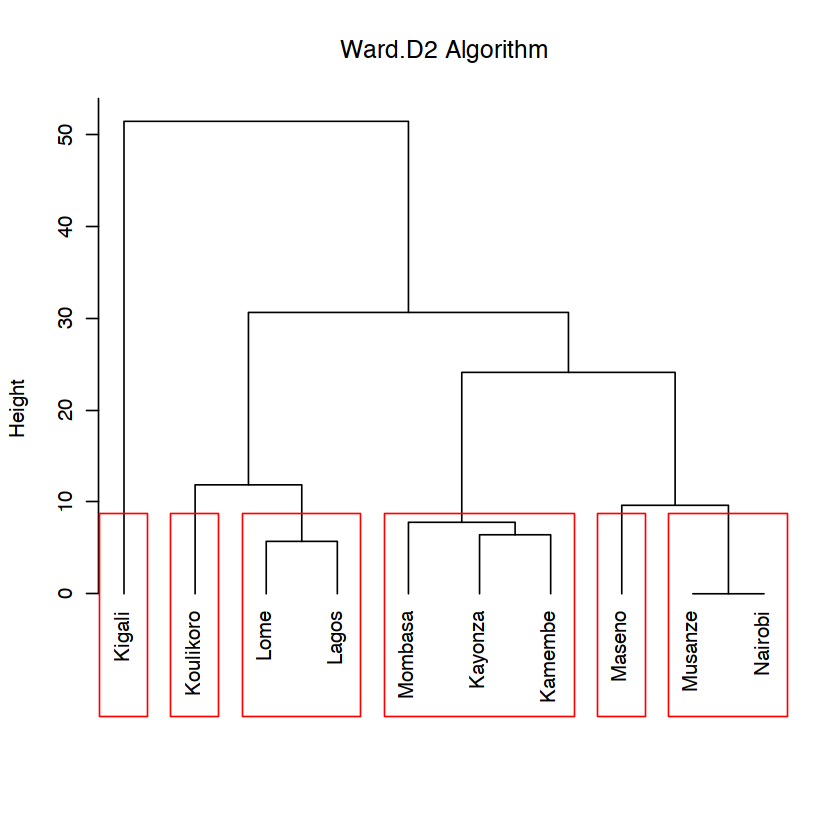

In [197]:


####### performing the clustering############
cities.august.scaled.clus=hclust(dist(t(scale(cities))),method='ward.D2')

#####plotting the tree#################
#plot(cities.august.scaled.clus,hang=-6,col="blue")

#cutree(cities.august.scaled.clus,k=4)


plot(cities.august.scaled.clus,hang=-6, main = 'Ward.D2 Algorithm',xlab =" ", sub ="")
rect.hclust(cities.august.scaled.clus, k =6, border = 'red') ## selecting three clusters


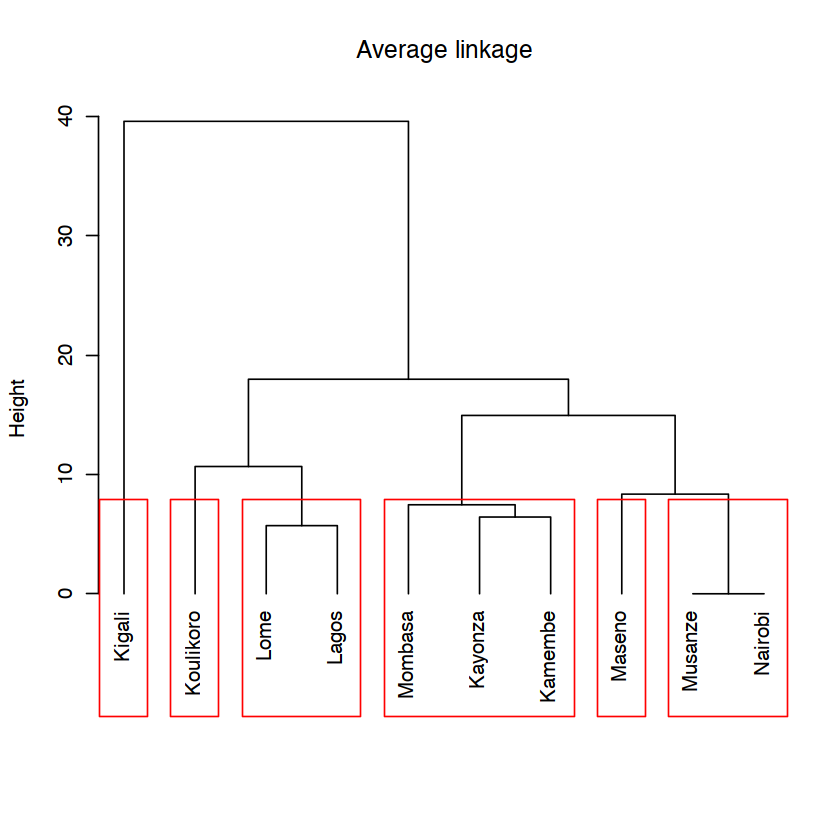

In [198]:
####### performing the clustering############
cities.august.scaled.clus=hclust(dist(t(scale(cities))),method='average')

#####plotting the tree#################
#plot(cities.august.scaled.clus,hang=-6,col="brown")

#cutree(cities.august.scaled.clus,k=4)
plot(cities.august.scaled.clus,hang=-6, main = 'Average linkage',xlab =" ", sub ="")
rect.hclust(cities.august.scaled.clus, k =6, border = 'red') ## selecting three clusters

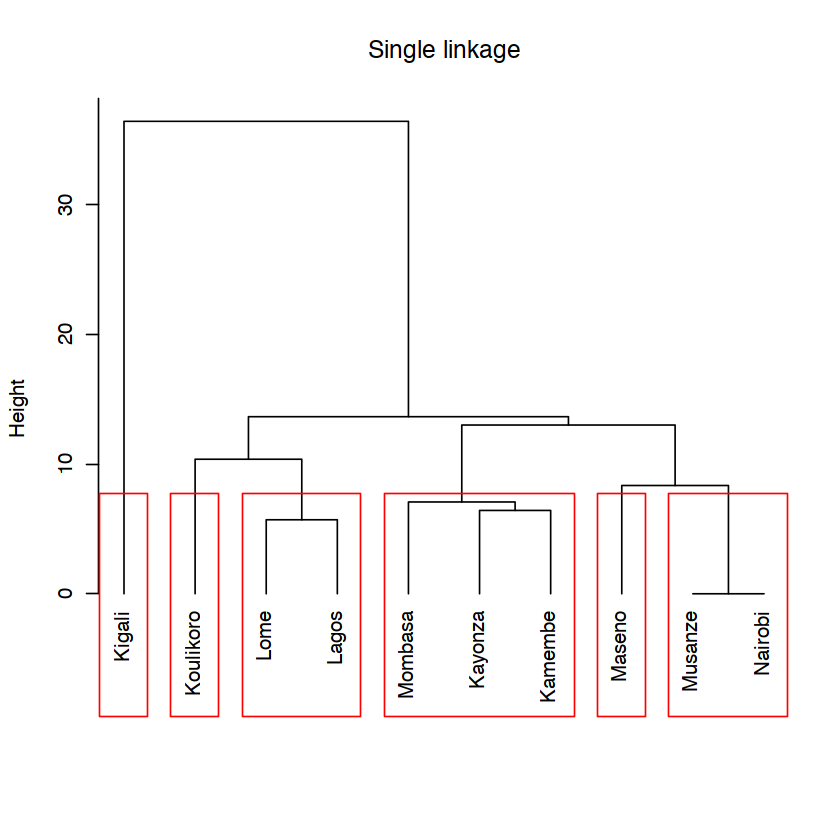

In [199]:
####### performing the clustering############
cities.august.scaled.clus=hclust(dist(t(scale(cities))),method='single')

#####plotting the tree#################
#plot(cities.august.scaled.clus,hang=-6,col="red")

#cutree(yy.clus,k=4)

plot(cities.august.scaled.clus, main = 'Single linkage',xlab =" ", hang=-6,sub ="")
rect.hclust(cities.august.scaled.clus, k =6, border = 'red') ## selecting three clusters

## Exercise 2: Principal Component Analysis (PCA)

In [208]:
## Unrotated PCA
pc1 <- principal(scale(cities), nfactors = 2, rotate = "none")


Warning message in log(det(m.inv.r)):
“NaNs produced”
The determinant of the smoothed correlation was zero.
This means the objective function is not defined for the null model either.
The Chi square is thus based upon observed correlations.

In factor.stats, the correlation matrix is singular, an approximation is used

Warning message in principal(scale(cities), nfactors = 2, rotate = "none"):
“The matrix is not positive semi-definite, scores found from Structure loadings”


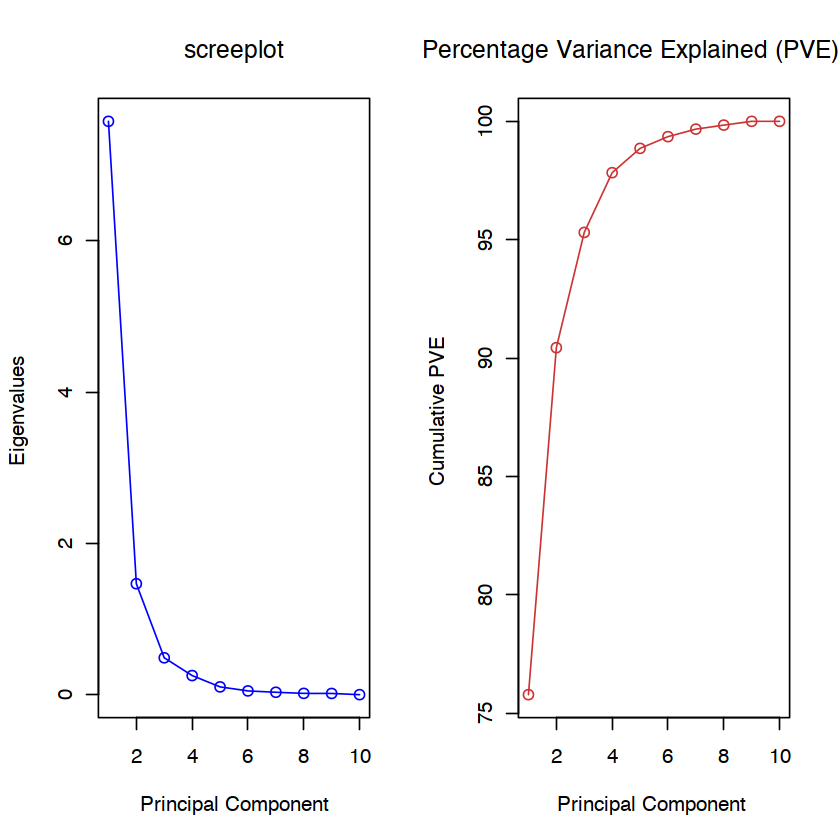

In [311]:
par(mfrow = c(1,2))
pve <- 100* pc1$values/sum(pc1$values) 
plot(pc1$values, type ="o" , ylab ="Eigenvalues " , xlab ="Principal Component" ,
     col ="blue", main = 'screeplot')
plot (cumsum(pve) , type ="o" , ylab ="Cumulative PVE " , xlab ="Principal Component " , col ="brown3 ",
      main = 'Percentage Variance Explained (PVE) plot')


In [213]:
pc2 <- principal(scale(cities), nfactors = 4, rotate = "varimax") 

scores<- as.data.frame(pc2$scores)  #scores after rotation

The determinant of the smoothed correlation was zero.
This means the objective function is not defined.
Chi square is based upon observed residuals.

The determinant of the smoothed correlation was zero.
This means the objective function is not defined for the null model either.
The Chi square is thus based upon observed correlations.

In factor.stats, the correlation matrix is singular, an approximation is used

Warning message in principal(scale(cities), nfactors = 4, rotate = "varimax"):
“The matrix is not positive semi-definite, scores found from Structure loadings”


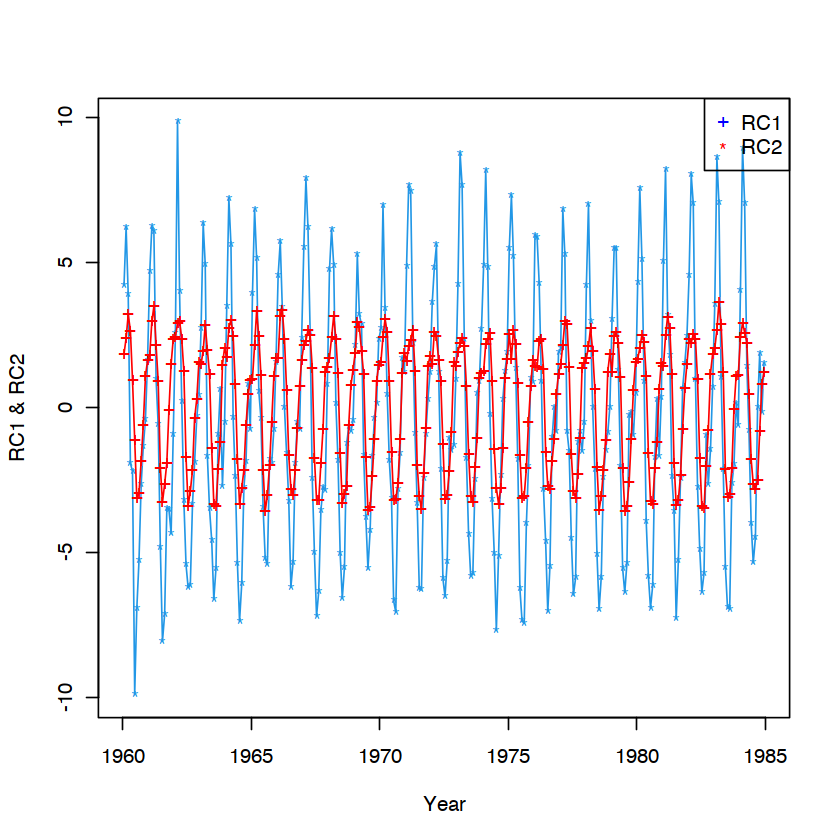

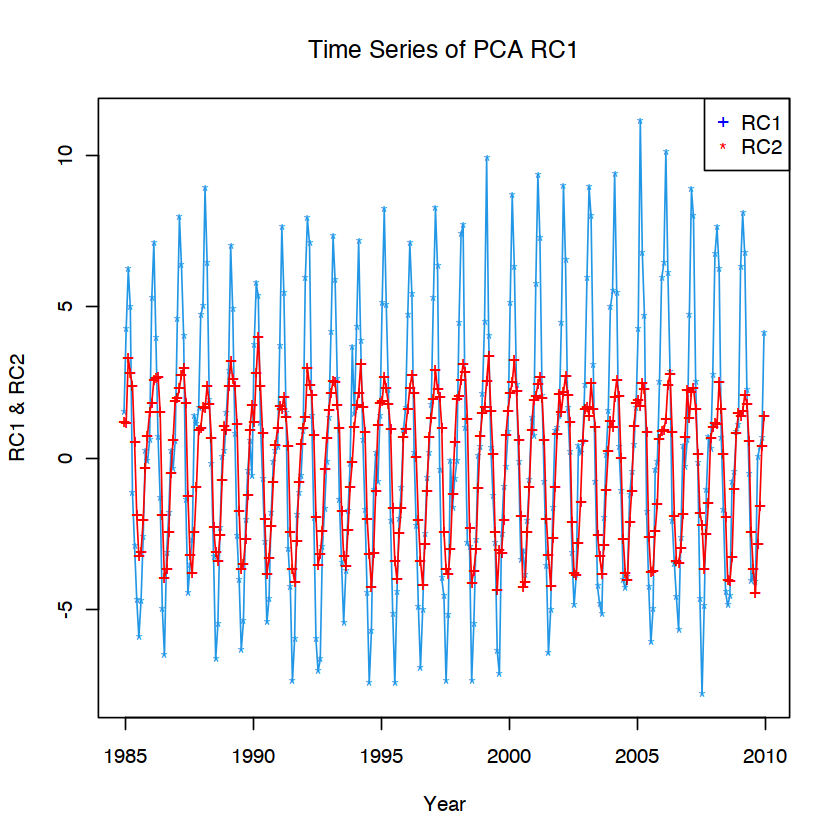

In [314]:
#plotting some of the scores
#plot(as.Date(cities_dataset$Date, '%m/%d/%Y'),scores$RC1,type ="o", xlab = 'year', ylab='RC1', main='Rotated Component 1')

#par(mfrow = c(3,2))
#Time Series of PCA RC1

plot(as.Date(cities_dataset$Date[1:300],"%d/%m/%Y"),scores$RC1[1:300],type="o",col=4,
xlab="Year", ylab="RC1 & RC2",
main="",pch="*")
lines(as.Date(cities_dataset$Date[1:300],"%d/%m/%Y"),scores$RC2[1:300],col="red",type="o",pch="+")
legend( x= "topright", y=0.92, 
        legend=c("RC1","RC2"), 
        col=c("blue", "red"),   
        pch=c("+","*"))

plot(as.Date(cities_dataset$Date[300:600],"%d/%m/%Y"),scores$RC1[300:600],type="o",col=4,
xlab="Year", ylab="RC1 & RC2",
main="Time Series of PCA RC1",pch="*")
lines(as.Date(cities_dataset$Date[300:600],"%d/%m/%Y"),scores$RC2[300:600],col="red",type="o",pch="+")
legend( x= "topright", y=0.92, 
        legend=c("RC1","RC2"), 
        col=c("blue", "red"),   
        pch=c("+","*"))


plot(as.Date(cities_dataset$Date[240:360],"%d/%m/%Y"),scores$RC1[240:360],type="o",col=4,
xlab="Year", ylab="RC1 & RC2",
main="",pch="*")
lines(as.Date(cities_dataset$Date[240:360],"%d/%m/%Y"),scores$RC2[240:360],col="red",type="o",pch="+")
legend( x= "topright", y=0.92, 
        legend=c("RC1","RC2"), 
        col=c("blue", "red"),   
        pch=c("+","*"))

plot(as.Date(cities_dataset$Date[360:480],"%d/%m/%Y"),scores$RC1[360:480],type="o",col=4,
xlab="Year", ylab="RC1 & RC2",
main="",pch="*")
lines(as.Date(cities_dataset$Date[360:480],"%d/%m/%Y"),scores$RC2[360:480],col="red",type="o",pch="+")
legend( x= "topright", y=0.92, 
        legend=c("RC1","RC2"), 
        col=c("blue", "red"),   
        pch=c("+","*"))

plot(as.Date(cities_dataset$Date[480:600],"%d/%m/%Y"),scores$RC1[480:600],type="o",col=4,
xlab="Year", ylab="RC1 & RC2",
main="Time Series of PCA RC1",pch="*")
lines(as.Date(cities_dataset$Date[480:600],"%d/%m/%Y"),scores$RC2[480:600],col="red",type="o",pch="+")
legend( x= "topright", y=0.92, 
        legend=c("RC1","RC2"), 
        col=c("blue", "red"),   
        pch=c("+","*"))

#### Access to the PCA results

In [310]:
pc2$loadings


Loadings:
          RC3    RC1    RC4    RC2   
Musanze    0.865  0.399  0.271       
Mombasa    0.443  0.825  0.330       
Maseno     0.903  0.301  0.230       
Lome       0.377  0.394  0.750  0.351
Lagos      0.333  0.383  0.772  0.365
Koulikoro  0.394  0.501  0.526  0.509
Kigali                  -0.239 -0.966
Kayonza    0.551  0.744  0.314  0.144
Kamembe    0.505  0.747  0.371  0.181
Nairobi    0.865  0.399  0.271       

                 RC3   RC1   RC4   RC2
SS loadings    3.476 2.756 2.038 1.513
Proportion Var 0.348 0.276 0.204 0.151
Cumulative Var 0.348 0.623 0.827 0.978

In [315]:
summary(pc2)


Factor analysis with Call: principal(r = scale(cities), nfactors = 4, rotate = "varimax")

Test of the hypothesis that 4 factors are sufficient.
The degrees of freedom for the model is 11  and the objective function was  0.01 
The number of observations was  612  with Chi Square =  8.79  with prob <  0.64 

The root mean square of the residuals (RMSA) is  0.01 


In [316]:
pc2$values

[1] 7.577546e+00 1.466033e+00 4.870469e-01 2.524123e-01 1.026978e-01
 [6] 4.955822e-02 3.180026e-02 1.700531e-02 1.590053e-02 3.545179e-16